# ¿Hay una corelación entre mes del año, Nº muertes y hemisferio?

In [397]:
!pip install countryinfo

     |████████████████████████████████| 602 kB 3.3 MB/s eta 0:00:01


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from countryinfo import CountryInfo
import seaborn as sns

In [7]:
df = pd.read_csv('./GSAF5.csv')

In [8]:
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6,NaN,NaN
5988,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5,NaN,NaN
5989,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4,NaN,NaN
5990,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8�N, 79�W",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3,NaN,NaN


In [9]:
#saber los valores nulos por cada columna

df.isna().sum()

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
pdf                          0
href formula                 1
href                         3
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64

In [10]:
#Vemos que las columnas unamed tienen muchos nulos. Como todos sus valores no son nulos, no podemos utilizar dropna. Utilizo la formula del para eliminar las columnas unnamed 22 y 23.

In [11]:
del df['Unnamed: 22']
del df['Unnamed: 23']

In [12]:
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,N,10h43,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,N,NaN,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,N,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6
5988,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5
5989,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4
5990,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8�N, 79�W",NaN,Jules Patterson,M,...,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3


In [13]:
#eliminamos posibles duplicados y vemos que no hay

In [14]:
df.drop_duplicates()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,N,10h43,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,N,NaN,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,N,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6
5988,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5
5989,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4
5990,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8�N, 79�W",NaN,Jules Patterson,M,...,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3


In [15]:
#vamos a eliminar duplicados basados en el num de caso para asegurarnos y vemos que el numero de filas baja de 5992 a 5976

In [16]:
df.drop_duplicates(subset=['Case Number'],inplace=True)

df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,N,10h43,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,N,NaN,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,N,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6
5988,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5
5989,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4
5990,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8�N, 79�W",NaN,Jules Patterson,M,...,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3


In [17]:
#Como nos interesan los paises y el mes del año, cremos un nuevo data son donde eliminamos todas las columnas que no nos sirvan pero mantenemos sexo y fatal para estudiar posibles corelaciones

In [18]:
df2 = df[['Date', 'Country', 'Sex', 'Fatal (Y/N)', 'Activity']]

df2

KeyError: "['Sex'] not in index"

In [19]:
#como la columna sex nos da problemas, vamos a ver los nombres de las columnas para verificar
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [20]:
#vemos que la columna Sex tiene un espacio, lo añadimos y ya tenemos el nuevo dataframe

df2 = df[['Date', 'Country', 'Sex ', 'Fatal (Y/N)', 'Activity']]

df2

,Date,Country,Sex,Fatal (Y/N),Activity
0,18-Sep-16,USA,M,N,Surfing
1,18-Sep-16,USA,M,N,Surfing
2,18-Sep-16,USA,M,N,Surfing
3,17-Sep-16,AUSTRALIA,M,N,Surfing
4,16-Sep-16,AUSTRALIA,M,N,Surfing
...,...,...,...,...,...
5987,Before 1903,AUSTRALIA,M,Y,Diving
5988,Before 1903,AUSTRALIA,M,Y,Pearl diving
5989,1900-1905,USA,M,Y,Swimming
5990,1883-1889,PANAMA,M,Y,NaN


In [21]:
#renombramos las columnas sex y fatal

In [22]:
df2 = df2.rename(columns={'Sex ': 'Sex', 'Fatal (Y/N)': 'Fatal'})

df2

,Date,Country,Sex,Fatal,Activity
0,18-Sep-16,USA,M,N,Surfing
1,18-Sep-16,USA,M,N,Surfing
2,18-Sep-16,USA,M,N,Surfing
3,17-Sep-16,AUSTRALIA,M,N,Surfing
4,16-Sep-16,AUSTRALIA,M,N,Surfing
...,...,...,...,...,...
5987,Before 1903,AUSTRALIA,M,Y,Diving
5988,Before 1903,AUSTRALIA,M,Y,Pearl diving
5989,1900-1905,USA,M,Y,Swimming
5990,1883-1889,PANAMA,M,Y,NaN


In [23]:
#añadimos en opción de fatal una tercera opción que sea U = Unknow porque vemos que tiene 19 valores nulos

df2.isna().sum()

Date          0
Country      43
Sex         566
Fatal        19
Activity    525
dtype: int64

In [24]:
df2["Fatal"].fillna("U", inplace = True)

df2

,Date,Country,Sex,Fatal,Activity
0,18-Sep-16,USA,M,N,Surfing
1,18-Sep-16,USA,M,N,Surfing
2,18-Sep-16,USA,M,N,Surfing
3,17-Sep-16,AUSTRALIA,M,N,Surfing
4,16-Sep-16,AUSTRALIA,M,N,Surfing
...,...,...,...,...,...
5987,Before 1903,AUSTRALIA,M,Y,Diving
5988,Before 1903,AUSTRALIA,M,Y,Pearl diving
5989,1900-1905,USA,M,Y,Swimming
5990,1883-1889,PANAMA,M,Y,NaN


In [25]:
#como vemos que hay 43 casos que no sabemos los paises, decido eliminar estos casos porque representan el 0,07% del total

In [26]:
df2.dropna(subset=['Country'], inplace=True)

In [27]:
df2

,Date,Country,Sex,Fatal,Activity
0,18-Sep-16,USA,M,N,Surfing
1,18-Sep-16,USA,M,N,Surfing
2,18-Sep-16,USA,M,N,Surfing
3,17-Sep-16,AUSTRALIA,M,N,Surfing
4,16-Sep-16,AUSTRALIA,M,N,Surfing
...,...,...,...,...,...
5987,Before 1903,AUSTRALIA,M,Y,Diving
5988,Before 1903,AUSTRALIA,M,Y,Pearl diving
5989,1900-1905,USA,M,Y,Swimming
5990,1883-1889,PANAMA,M,Y,NaN


In [28]:
countries = df2["Country"].unique()
countries

array(['USA', 'AUSTRALIA', 'NEW CALEDONIA', 'REUNION', 'BAHAMAS', 'SPAIN',
       'CHINA', 'JAPAN', 'COLUMBIA', 'SOUTH AFRICA', 'EGYPT',
       'NEW ZEALAND', 'INDONESIA', 'FRENCH POLYNESIA', 'CAPE VERDE',
       'Fiji', 'BRAZIL', 'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS',
       'UNITED ARAB EMIRATES', 'ARUBA', 'MOZAMBIQUE', 'THAILAND', 'FIJI',
       'PUERTO RICO', 'ITALY', 'MEXICO', 'ATLANTIC OCEAN', 'GREECE',
       'MAURITIUS', 'ST. MARTIN', 'FRANCE', 'ECUADOR', 'PAPUA NEW GUINEA',
       'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL', 'DIEGO GARCIA',
       'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES', 'GUAM',
       'SEYCHELLES', 'BELIZE', 'PHILIPPINES', 'NIGERIA', 'TONGA',
       'SCOTLAND', 'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE',
       'ANTIGUA', 'KENYA', 'RUSSIA', 'TURKS & CAICOS', 'COSTA RICA',
       'UNITED KINGDOM', 'MALAYSIA', 'UNITED ARAB EMIRATES (UAE)',
       'SAMOA', 'AZORES', 'SOLOMON ISLANDS', 'SOUTH KOREA', 'MALTA',
       'VIETNAM', 'MADAGASCAR', 'PANAMA', 'SOM

In [29]:
df2['Country'].value_counts()

USA                       2109
AUSTRALIA                 1277
SOUTH AFRICA               563
PAPUA NEW GUINEA           133
NEW ZEALAND                124
                          ... 
 PHILIPPINES                 1
MARTINIQUE                   1
RED SEA / INDIAN OCEAN       1
THE BALKANS                  1
JAVA                         1
Name: Country, Length: 203, dtype: int64

In [30]:
#elimino todos los paises donde solo ha habido un caso

sum(df2['Country'].value_counts()==1)

82

In [31]:
num_cases = df2['Country'].value_counts()

In [32]:
one_case = num_cases[num_cases == 1].index

In [33]:
df3 = df2[~df2.Country.isin(one_case)]

In [34]:
df3

,Date,Country,Sex,Fatal,Activity
0,18-Sep-16,USA,M,N,Surfing
1,18-Sep-16,USA,M,N,Surfing
2,18-Sep-16,USA,M,N,Surfing
3,17-Sep-16,AUSTRALIA,M,N,Surfing
4,16-Sep-16,AUSTRALIA,M,N,Surfing
...,...,...,...,...,...
5986,Before 1906,AUSTRALIA,M,Y,Swimming
5987,Before 1903,AUSTRALIA,M,Y,Diving
5988,Before 1903,AUSTRALIA,M,Y,Pearl diving
5989,1900-1905,USA,M,Y,Swimming


In [35]:
df3['Country'].value_counts()

USA                    2109
AUSTRALIA              1277
SOUTH AFRICA            563
PAPUA NEW GUINEA        133
NEW ZEALAND             124
                       ... 
CENTRAL PACIFIC           2
EGYPT                     2
SOUTH PACIFIC OCEAN       2
MEDITERRANEAN SEA         2
YEMEN                     2
Name: Country, Length: 121, dtype: int64

In [36]:
countries = df3["Country"].unique()
countries

array(['USA', 'AUSTRALIA', 'NEW CALEDONIA', 'REUNION', 'BAHAMAS', 'SPAIN',
       'CHINA', 'JAPAN', 'COLUMBIA', 'SOUTH AFRICA', 'EGYPT',
       'NEW ZEALAND', 'INDONESIA', 'FRENCH POLYNESIA', 'CAPE VERDE',
       'Fiji', 'BRAZIL', 'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS',
       'MOZAMBIQUE', 'THAILAND', 'FIJI', 'ITALY', 'MEXICO',
       'ATLANTIC OCEAN', 'GREECE', 'MAURITIUS', 'FRANCE', 'ECUADOR',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'TAIWAN', 'JAMAICA', 'GUAM', 'SEYCHELLES', 'BELIZE', 'PHILIPPINES',
       'NIGERIA', 'TONGA', 'SCOTLAND', 'CANADA', 'CROATIA',
       'SAUDI ARABIA', 'CHILE', 'KENYA', 'RUSSIA', 'TURKS & CAICOS',
       'COSTA RICA', 'UNITED KINGDOM', 'MALAYSIA',
       'UNITED ARAB EMIRATES (UAE)', 'SAMOA', 'AZORES', 'SOLOMON ISLANDS',
       'SOUTH KOREA', 'MALTA', 'VIETNAM', 'MADAGASCAR', 'PANAMA',
       'SOMALIA', 'CUBA', 'ENGLAND', 'NORWAY', 'SENEGAL', 'YEMEN',
       'LIBERIA', 'VANUATU', 'VENEZUELA', 'SRI LANKA', ' TONGA',
  

In [37]:
df3["Country"].value_counts()

USA                    2109
AUSTRALIA              1277
SOUTH AFRICA            563
PAPUA NEW GUINEA        133
NEW ZEALAND             124
                       ... 
CENTRAL PACIFIC           2
EGYPT                     2
SOUTH PACIFIC OCEAN       2
MEDITERRANEAN SEA         2
YEMEN                     2
Name: Country, Length: 121, dtype: int64

## Opción 1 (utilizando el module countryinfo)

In [38]:
def country_hem(col):
    hem_lst = []
    for row in col:
        try:
            country = CountryInfo(row)
        except AttributeError:
            row = 'x'
   
        try:
            pos = country.latlng()
        except KeyError:
            pos = (0,0)
    
        if pos[0] > 0:
            temp_row = 1
        elif pos[0] < 0:
            temp_row = 0
        else:
            temp_row = np.nan
    
        hem_lst.append(temp_row)
    
    return hem_lst

In [39]:
#salia un warning que queria evitar

pd.options.mode.chained_assignment = None

In [40]:
df3['hemisphere'] = country_hem(df3['Country'])

KeyboardInterrupt: 

In [ ]:
df3

## Opción 2: utilizando listas

In [41]:
df4 = df3[['Date', 'Country', 'Sex', 'Fatal', 'Activity']]

In [42]:
df4

,Date,Country,Sex,Fatal,Activity
0,18-Sep-16,USA,M,N,Surfing
1,18-Sep-16,USA,M,N,Surfing
2,18-Sep-16,USA,M,N,Surfing
3,17-Sep-16,AUSTRALIA,M,N,Surfing
4,16-Sep-16,AUSTRALIA,M,N,Surfing
...,...,...,...,...,...
5986,Before 1906,AUSTRALIA,M,Y,Swimming
5987,Before 1903,AUSTRALIA,M,Y,Diving
5988,Before 1903,AUSTRALIA,M,Y,Pearl diving
5989,1900-1905,USA,M,Y,Swimming


In [43]:
north = ['USA', 'BAHAMAS', 'SPAIN', 'CHINA', 'JAPAN', 'COLUMBIA', 'EGYPT', 
          'INDONESIA', 'CAPE VERDE', 'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS',
          'THAILAND', 'ITALY', 'MEXICO', 'GREECE', 'FRANCE', 'TRINIDAD & TOBAGO',  
          'ISRAEL', 'TAIWAN', 'JAMAICA', 'GUAM', 'BELIZE', 'PHILIPPINES',
          'NIGERIA', 'TONGA', 'SCOTLAND', 'CANADA', 'CROATIA', 'SAUDI ARABIA', 
          'CHILE', 'KENYA', 'RUSSIA', 'TURKS & CAICOS', 'COSTA RICA', 'UNITED KINGDOM', 
          'MALAYSIA', 'UNITED ARAB EMIRATES (UAE)', 'AZORES', 'SOUTH KOREA', 
          'MALTA', 'VIETNAM', 'PANAMA', 'SOMALIA', 'CUBA', 'ENGLAND', 'NORWAY', 
          'SENEGAL', 'YEMEN', 'LIBERIA', 'VENEZUELA', 'SRI LANKA', 'INDIA', 'MICRONESIA', 
          'CARIBBEAN SEA', 'OKINAWA', 'MARSHALL ISLANDS', 'HONG KONG', 'EL SALVADOR',
          'BERMUDA', 'MONTENEGRO', 'IRAN', 'TUNISIA', 'NORTH ATLANTIC OCEAN', 
          'PORTUGAL', 'PALAU', 'GRENADA', 'IRAQ', 'TURKEY', 'SINGAPORE', 'SUDAN',
          'JOHNSTON ISLAND', 'NORTH PACIFIC OCEAN', 'PERSIAN GULF', 'INDIAN OCEAN', 
          'SIERRA LEONE', 'NICARAGUA', 'BARBADOS', 'HONDURAS', 'HAITI', 'LIBYA', 'YEMEN ', 
          'CRETE', 'EGYPT ', 'BURMA', 'LEBANON', 'GUINEA', 'MEDITERRANEAN SEA']

In [44]:
south = ['AUSTRALIA', 'NEW CALEDONIA', 'REUNION', 'SOUTH AFRICA', 
         'NEW ZEALAND', 'FRENCH POLYNESIA', 'Fiji', 'BRAZIL', 'MOZAMBIQUE', 
         'FIJI', 'MAURITIUS', 'ECUADOR', 'PAPUA NEW GUINEA', 'KIRIBATI', 'SAMOA', 
         'SEYCHELLES', 'SOLOMON ISLANDS', 'MADAGASCAR', 'VANUATU', ' TONGA', 
         'URUGUAY', 'TANZANIA', 'NAMIBIA', 'NEW BRITAIN', 'SOUTH PACIFIC OCEAN', 
         'NEW GUINEA', 'AMERICAN SAMOA', 'CENTRAL PACIFIC', 'SOUTHWEST PACIFIC OCEAN']

In [45]:
other = ['ATLANTIC OCEAN', 'PACIFIC OCEAN ', 'MID ATLANTIC OCEAN', 'SOUTH ATLANTIC OCEAN', 'PACIFIC OCEAN']

In [46]:
#eliminamos todos los que estan en other porque no podemos determinar si es sur o norte

In [47]:
df5 = df4[~df4.Country.isin(other)]

In [48]:
#Asignamos a N los valores que tienen paises que estan en la lista north, el resto sabemos que todos son south por lo que les asignamos S

In [49]:
df5["Hemisphere"] = np.where(df5["Country"].isin(north), "N", "S")

In [50]:
df5

,Date,Country,Sex,Fatal,Activity,Hemisphere
0,18-Sep-16,USA,M,N,Surfing,N
1,18-Sep-16,USA,M,N,Surfing,N
2,18-Sep-16,USA,M,N,Surfing,N
3,17-Sep-16,AUSTRALIA,M,N,Surfing,S
4,16-Sep-16,AUSTRALIA,M,N,Surfing,S
...,...,...,...,...,...,...
5986,Before 1906,AUSTRALIA,M,Y,Swimming,S
5987,Before 1903,AUSTRALIA,M,Y,Diving,S
5988,Before 1903,AUSTRALIA,M,Y,Pearl diving,S
5989,1900-1905,USA,M,Y,Swimming,N


In [51]:
df5['Hemisphere'].value_counts()

N    3235
S    2564
Name: Hemisphere, dtype: int64

In [52]:
#Durante la clasificación me di cuenta que existian Fiji y FIJI por lo que paso todo a mayuculas y compruebo
df5['Country'] = df5['Country'].str.upper()
df5["Country"].unique()

array(['USA', 'AUSTRALIA', 'NEW CALEDONIA', 'REUNION', 'BAHAMAS', 'SPAIN',
       'CHINA', 'JAPAN', 'COLUMBIA', 'SOUTH AFRICA', 'EGYPT',
       'NEW ZEALAND', 'INDONESIA', 'FRENCH POLYNESIA', 'CAPE VERDE',
       'FIJI', 'BRAZIL', 'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS',
       'MOZAMBIQUE', 'THAILAND', 'ITALY', 'MEXICO', 'GREECE', 'MAURITIUS',
       'FRANCE', 'ECUADOR', 'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO',
       'KIRIBATI', 'ISRAEL', 'TAIWAN', 'JAMAICA', 'GUAM', 'SEYCHELLES',
       'BELIZE', 'PHILIPPINES', 'NIGERIA', 'TONGA', 'SCOTLAND', 'CANADA',
       'CROATIA', 'SAUDI ARABIA', 'CHILE', 'KENYA', 'RUSSIA',
       'TURKS & CAICOS', 'COSTA RICA', 'UNITED KINGDOM', 'MALAYSIA',
       'UNITED ARAB EMIRATES (UAE)', 'SAMOA', 'AZORES', 'SOLOMON ISLANDS',
       'SOUTH KOREA', 'MALTA', 'VIETNAM', 'MADAGASCAR', 'PANAMA',
       'SOMALIA', 'CUBA', 'ENGLAND', 'NORWAY', 'SENEGAL', 'YEMEN',
       'LIBERIA', 'VANUATU', 'VENEZUELA', 'SRI LANKA', ' TONGA',
       'URUGUAY', 'INDIA', 'MICRONE

In [53]:
#Ahora vamos con la variable de los meses

In [54]:
#pasamos todas las fechas a un formato común, las que no se pueda (porque solo indica año o el mes esta escrito serán nulos)
df5['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [55]:
#comprovamos cuantas son nulas y vemos que son 796 (representan un 13% del total res) pero las eliminamos
df5.isna().sum()

Date          796
Country         0
Sex           544
Fatal           0
Activity      510
Hemisphere      0
dtype: int64

In [56]:
df5.dropna(subset=['Date'], inplace=True)

In [57]:
df5

,Date,Country,Sex,Fatal,Activity,Hemisphere
0,2016-09-18,USA,M,N,Surfing,N
1,2016-09-18,USA,M,N,Surfing,N
2,2016-09-18,USA,M,N,Surfing,N
3,2016-09-17,AUSTRALIA,M,N,Surfing,S
4,2016-09-16,AUSTRALIA,M,N,Surfing,S
...,...,...,...,...,...,...
5843,1758-01-01,MEDITERRANEAN SEA,M,N,Fell overboard from a frigate & was swallowed ...,N
5844,1749-01-01,CUBA,M,N,Swimming,N
5846,1748-01-01,PANAMA,M,Y,Pearl diving,N
5850,1721-06-01,ITALY,M,Y,Swimming,N


In [58]:
df5['Month'] = pd.DatetimeIndex(df5['Date']).month

In [59]:
df5

,Date,Country,Sex,Fatal,Activity,Hemisphere,Month
0,2016-09-18,USA,M,N,Surfing,N,9
1,2016-09-18,USA,M,N,Surfing,N,9
2,2016-09-18,USA,M,N,Surfing,N,9
3,2016-09-17,AUSTRALIA,M,N,Surfing,S,9
4,2016-09-16,AUSTRALIA,M,N,Surfing,S,9
...,...,...,...,...,...,...,...
5843,1758-01-01,MEDITERRANEAN SEA,M,N,Fell overboard from a frigate & was swallowed ...,N,1
5844,1749-01-01,CUBA,M,N,Swimming,N,1
5846,1748-01-01,PANAMA,M,Y,Pearl diving,N,1
5850,1721-06-01,ITALY,M,Y,Swimming,N,6


In [60]:
df5.groupby(["Hemisphere","Month"])['Fatal'].count()

Hemisphere  Month
N           1        223
            2         86
            3        132
            4        179
            5        203
            6        297
            7        432
            8        413
            9        346
            10       223
            11       150
            12        87
S           1        466
            2        232
            3        225
            4        177
            5        124
            6        113
            7        103
            8         97
            9         94
            10       138
            11       189
            12       274
Name: Fatal, dtype: int64

In [61]:
df_6 = df5[["Hemisphere","Month","Fatal"]]

In [62]:
df_6

,Hemisphere,Month,Fatal
0,N,9,N
1,N,9,N
2,N,9,N
3,S,9,N
4,S,9,N
...,...,...,...
5843,N,1,N
5844,N,1,N
5846,N,1,Y
5850,N,6,Y


In [63]:
df_6['Fatal'].value_counts()

N          3740
Y          1172
UNKNOWN      72
U             8
 N            8
#VALUE!       1
N             1
n             1
Name: Fatal, dtype: int64

In [64]:
df_6['Fatal'].unique()

array(['N', 'Y', 'U', 'UNKNOWN', ' N', 'N ', '#VALUE!', 'n'], dtype=object)

In [65]:
eliminate = ['U', 'UNKNOWN', ' N', 'N ', '#VALUE!', 'n']

In [66]:
df_def = df_6[~df_6.Fatal.isin(eliminate)]

In [67]:
df_def['Fatal'].unique()

array(['N', 'Y'], dtype=object)

In [68]:
df_def

,Hemisphere,Month,Fatal
0,N,9,N
1,N,9,N
2,N,9,N
3,S,9,N
4,S,9,N
...,...,...,...
5843,N,1,N
5844,N,1,N
5846,N,1,Y
5850,N,6,Y


In [78]:
df_def.groupby(["Month"])['Hemisphere'].value_counts()

Month  Hemisphere
1      S             455
       N             209
2      S             226
       N              85
3      S             222
       N             130
4      N             177
       S             175
5      N             201
       S             121
6      N             294
       S             110
7      N             427
       S             103
8      N             411
       S              96
9      N             340
       S              92
10     N             220
       S             133
11     S             183
       N             148
12     S             269
       N              85
Name: Hemisphere, dtype: int64

Text(0, 0.5, 'Nº Cases')

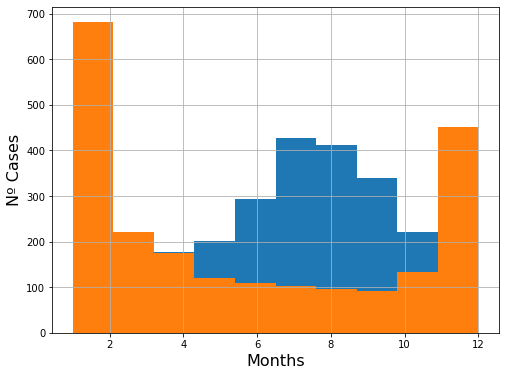

In [127]:
plt.figure(figsize=(8,6))

for pos in df_def["Hemisphere"].unique():
    df_def[df_def["Hemisphere"] == pos]["Month"].hist()
    
    
plt.xlabel("Months", fontsize=16)  
plt.ylabel("Nº Cases", fontsize=16)

In [82]:
no_muertos = ['N', "no"]

In [83]:
df_def_2 = df_def[~df_def.Fatal.isin(no_muertos)]

In [89]:
df_def_2.groupby(["Month"])['Hemisphere'].value_counts()

Month  Hemisphere
1      S             139
       N              75
2      S              55
       N              27
3      S              58
       N              23
4      S              50
       N              37
5      N              42
       S              36
6      N              53
       S              35
7      N              70
       S              29
8      N              75
       S              30
9      N              57
       S              36
10     N              28
       S              26
11     S              52
       N              29
12     S              85
       N              25
Name: Hemisphere, dtype: int64

Text(0, 0.5, 'Nº Deaths')

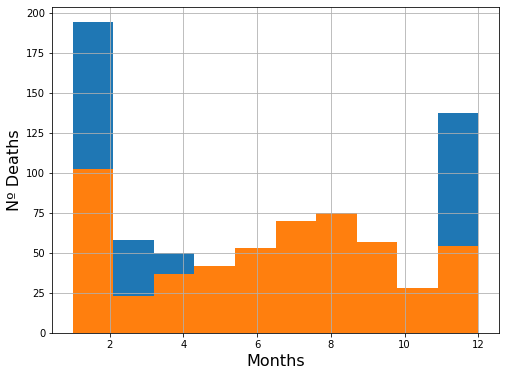

In [125]:
plt.figure(figsize=(8,6))

for pos in df_def_2["Hemisphere"].unique():
    df_def_2[df_def_2["Hemisphere"] == pos]["Month"].hist()
    
plt.xlabel("Months", fontsize=16)  
plt.ylabel("Nº Deaths", fontsize=16)

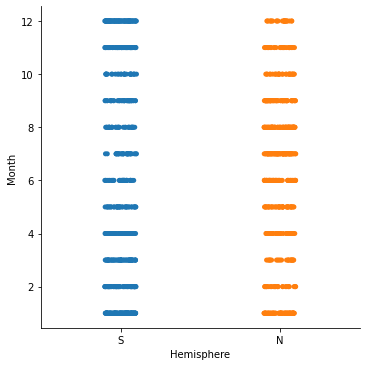

In [91]:
sns.catplot(data=df_def_2, x="Hemisphere", y="Month")

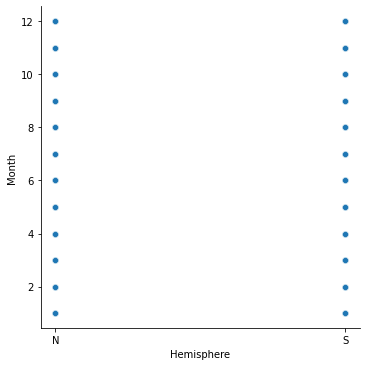

In [610]:
sns.relplot(data=df_def, x="Hemisphere", y="Month")

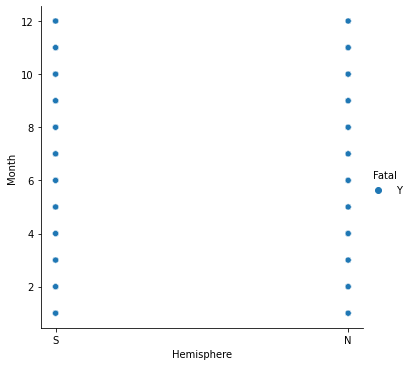

In [92]:
sns.relplot(x="Hemisphere", y="Month", hue="Fatal", data=df_def_2)

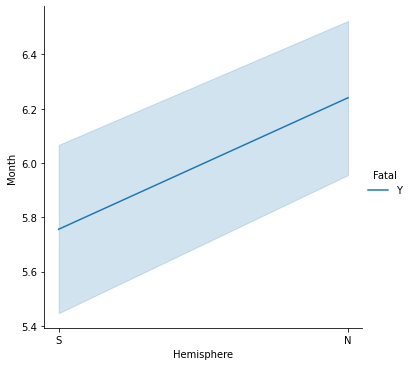

In [93]:
sns.relplot(x="Hemisphere", y="Month", hue="Fatal",
            kind="line", data=df_def_2)